# Ellipsoidal nested rejection sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data. For a tutorial on nested sampling, see: [INSERT LINK to NESTED SAMPLING TUTORIAL NOTEBOOK].

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

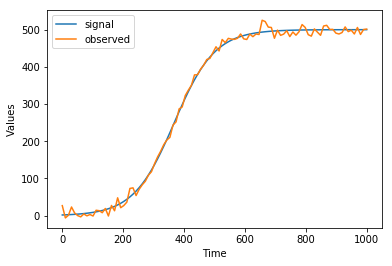

In [1]:
import os
os.chdir('../')
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedSampling(log_likelihood, log_prior)

# Set number of iterations
sampler.set_iterations(8000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

Run the sampler!

In [3]:
samples = sampler.run()
print('Done!')

Running Nested Ellipsoidal Rejection sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z)
0     1       0:00.0 -inf        
0     2       0:00.0 -inf        
0     3       0:00.0 -inf        
0     4       0:00.0 -inf        
0     5       0:00.0 -inf        
0     21      0:00.0 -inf        
0     41      0:00.0 -inf        
0     61      0:00.0 -inf        
0     81      0:00.0 -inf        
0     101     0:00.0 -inf        
0     121     0:00.0 -inf        
0     141     0:00.0 -inf        
0     161     0:00.0 -inf        
0     181     0:00.0 -inf        
0     201     0:00.0 -inf        
0     221     0:00.0 -inf        
0     241     0:00.0 -inf        
0     261     0:00.0 -inf        
0     281     0:00.0 -inf        
0     301     0:00.0 -inf        
0     321     0:00.0 -inf        
0     341     0:00.0 -inf        
0     361     0:00.0 -inf        
0     381     0:00.0 -inf        
400

C:\Users\bclamber\Desktop\pints\pints\_log_likelihoods.py:154: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))


1220  1148    0:00.6 -442.4389199
1240  1170    0:00.7 -414.6300204
1260  1188    0:00.7 -388.7284596
1280  1211    0:00.7 -368.5297034
1300  1232    0:00.7 -348.2512863
1320  1265    0:00.7 -332.1995414
1340  1280    0:00.8 -314.2475627
1360  1301    0:00.8 -301.5990931
1380  1320    0:00.8 -286.8985195
1400  1347    0:00.8 -275.3766102
1420  1372    0:00.8 -262.6644108
1440  1395    0:00.9 -244.4954094
1460  1423    0:00.9 -232.3901227
1480  1448    0:00.9 -221.7129982
1500  1474    0:00.9 -212.6764845
1520  1503    0:00.9 -205.6712022
1540  1539    0:01.0 -197.3773221
1560  1569    0:01.0 -189.849393 
1580  1598    0:01.0 -183.797002 
1600  1608    0:01.0 -175.5896717
1620  1636    0:01.0 -168.7593978
1640  1655    0:01.0 -162.7577547
1660  1671    0:01.1 -158.3601461
1680  1708    0:01.1 -153.566552 
1700  1740    0:01.1 -148.548953 
1720  1761    0:01.1 -145.1672264
1740  1790    0:01.1 -142.1843239
1760  1821    0:01.2 -138.5017828
1780  1844    0:01.2 -135.6686077
1800  1877    

## Plot posterior samples versus true parameter values (dashed lines)

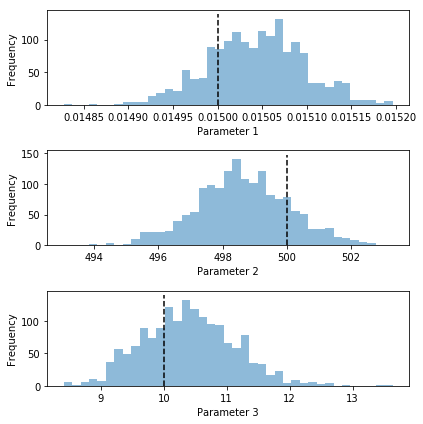

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

## Plot posterior predictive simulations versus the observed data

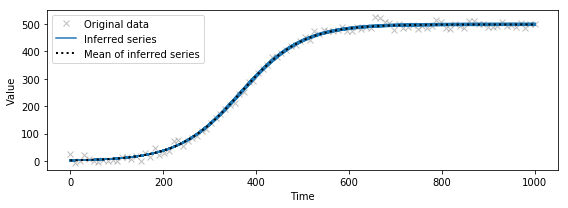

In [5]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [6]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -386.210666245 ± 0.0801896223551


## Effective sample size

In [7]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 1554.89332941
